In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import playlistgen as g
import datetime

In [5]:
tracks = g.all_tracks('Songs Worth Playing')

In [6]:
scored_unbiased = g.unrecent_score_tracks(tracks, False, 35)
df_u = pd.DataFrame([dict(((k.code, v) for k, v in b.iteritems()), score=a) for a, b in scored_unbiased])

In [7]:
scored_biased = g.unrecent_score_tracks(tracks, True, 35)
df_b = pd.DataFrame([dict(((k.code, v) for k, v in b.iteritems()), score=a) for a, b in scored_biased])

In [15]:
df = df_b.loc[~df_b['pPlD'].isnull()]
deltas = df['score'].diff()
deltas[0] = 0
deltas = deltas.values / (df['score'].tail(1) - df['score'][0]).values
date_considered = df_b[['pPlD', 'pSkD', 'pAdd']].max(axis=1)
df = df.assign(chance=deltas, date_considered=date_considered)

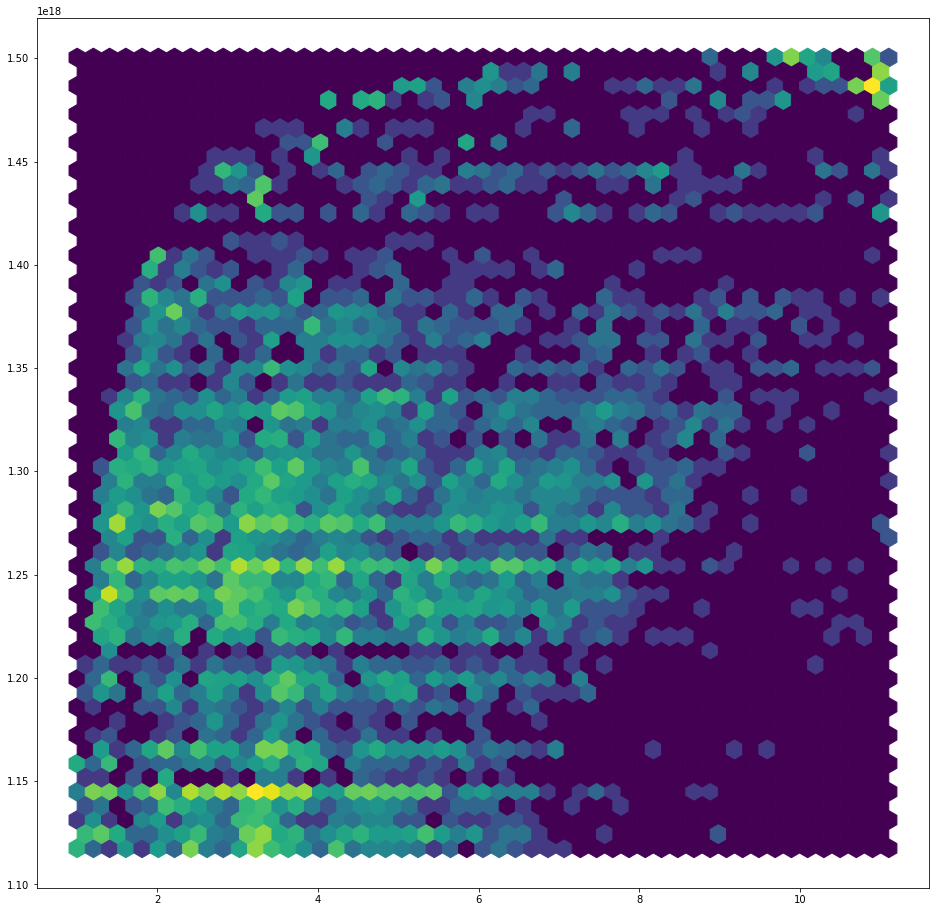

In [6]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.hexbin(df['score'], df['pAdd'].astype(np.int64), gridsize=50, bins='log')
plt.show()

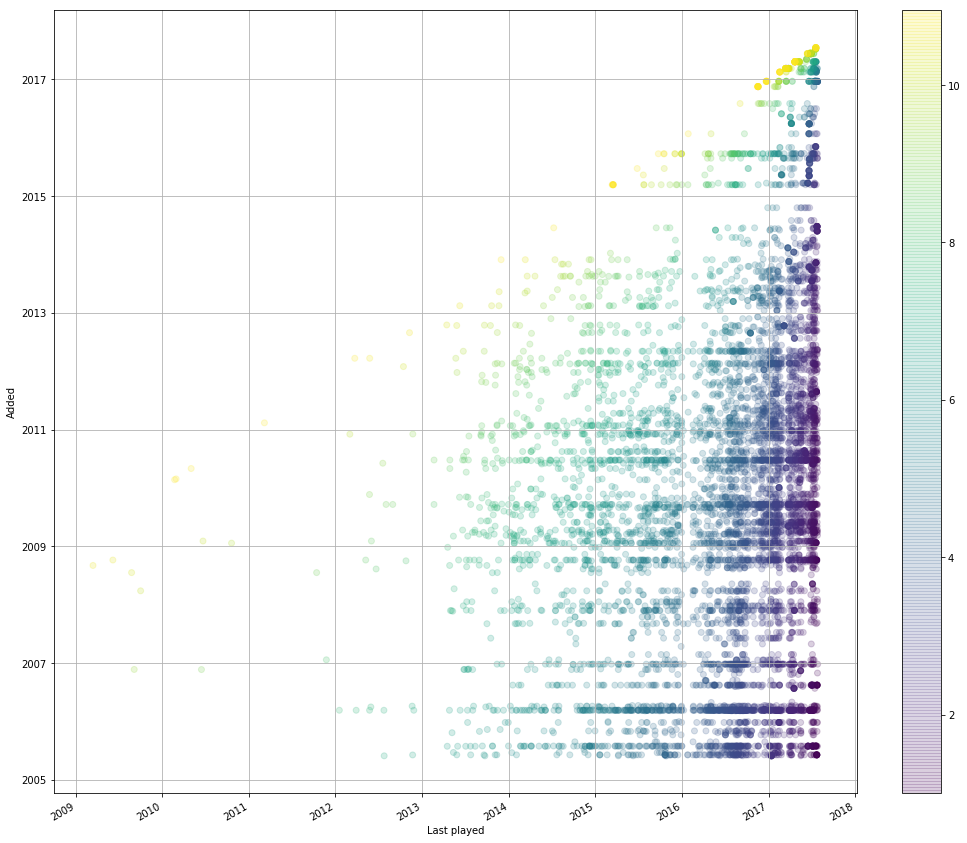

In [17]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.scatter([o.to_pydatetime() for o in df['date_considered']],
            [o.to_pydatetime() for o in df['pAdd']],
            c=df['score'], alpha=0.2)
ax.set_xlabel('Last played')
ax.set_ylabel('Added')
ax.grid(True)
fig.autofmt_xdate()
plt.colorbar(fraction=0.05)
plt.show()

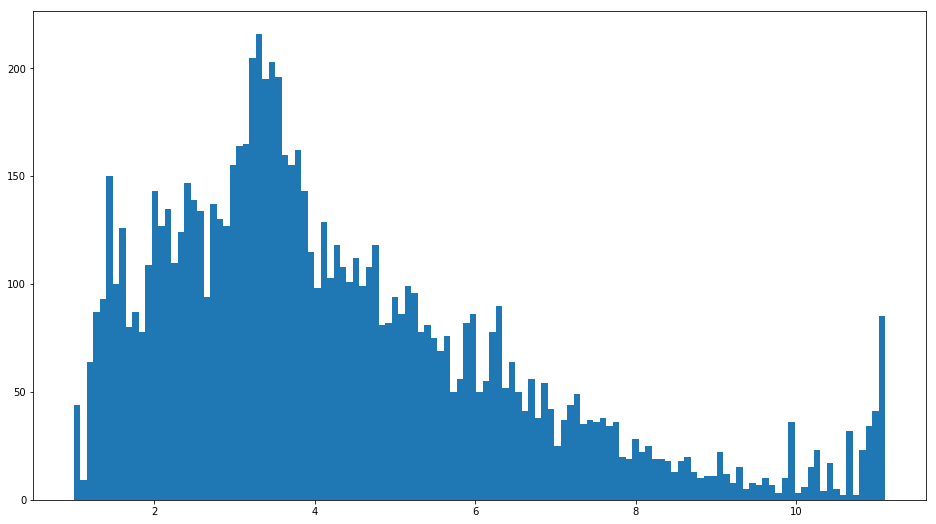

In [8]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.hist(df['score'], bins=125)
plt.show()

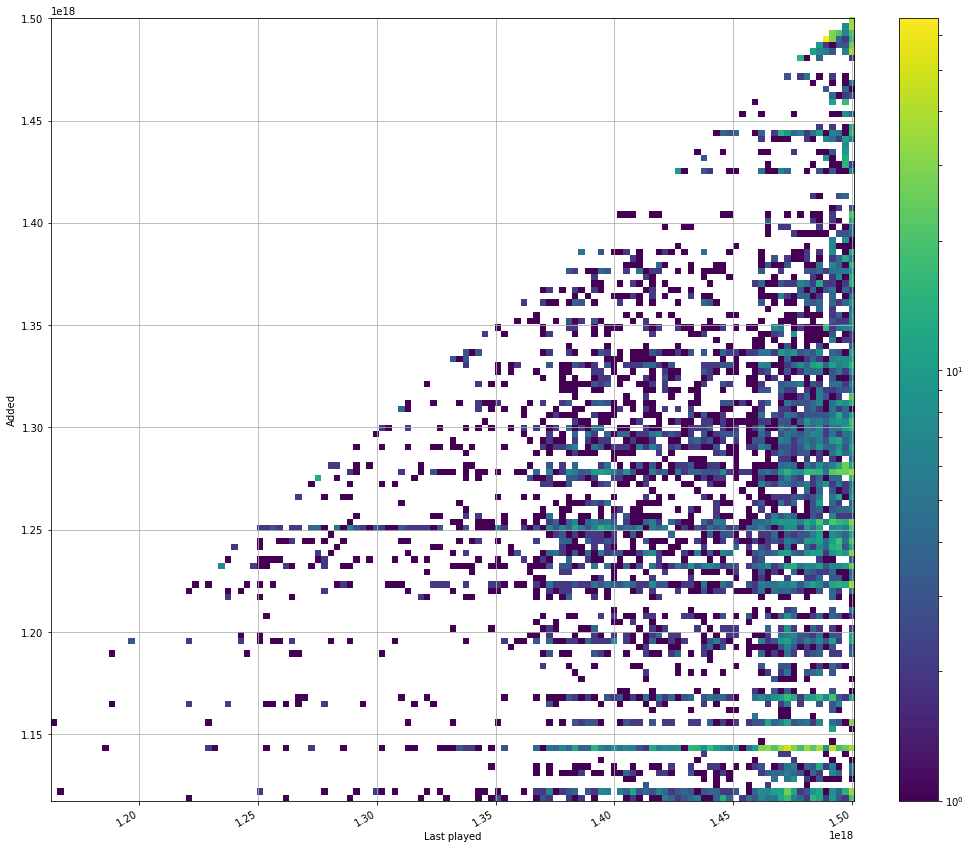

In [9]:
fig, ax = plt.subplots(figsize=(16, 16))
plt.hist2d(df['pPlD'].astype(np.int64),
           df['pAdd'].astype(np.int64),
           bins=125, norm=matplotlib.colors.LogNorm())
ax.set_xlabel('Last played')
ax.set_ylabel('Added')
ax.grid(True)
fig.autofmt_xdate()
plt.colorbar(fraction=0.05)
plt.show()

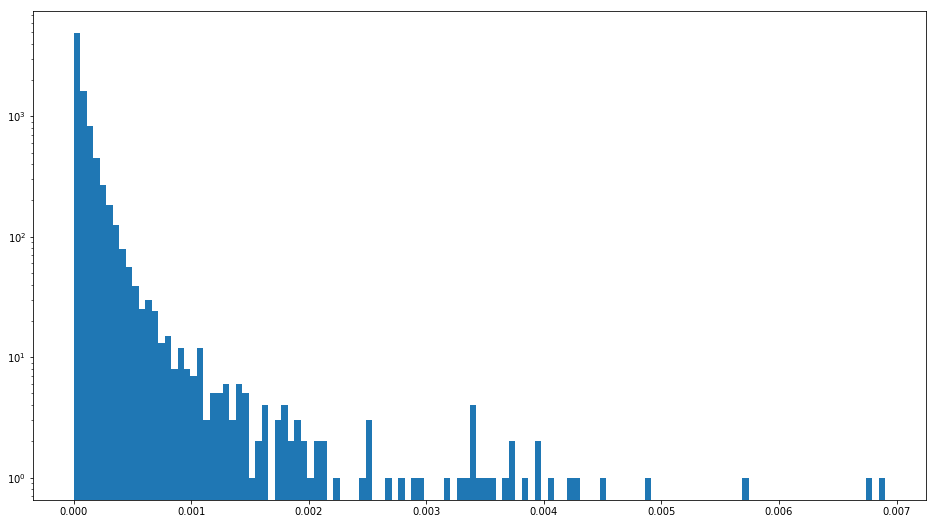

In [11]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.hist(df['chance'], bins=125, log=True)
plt.show()

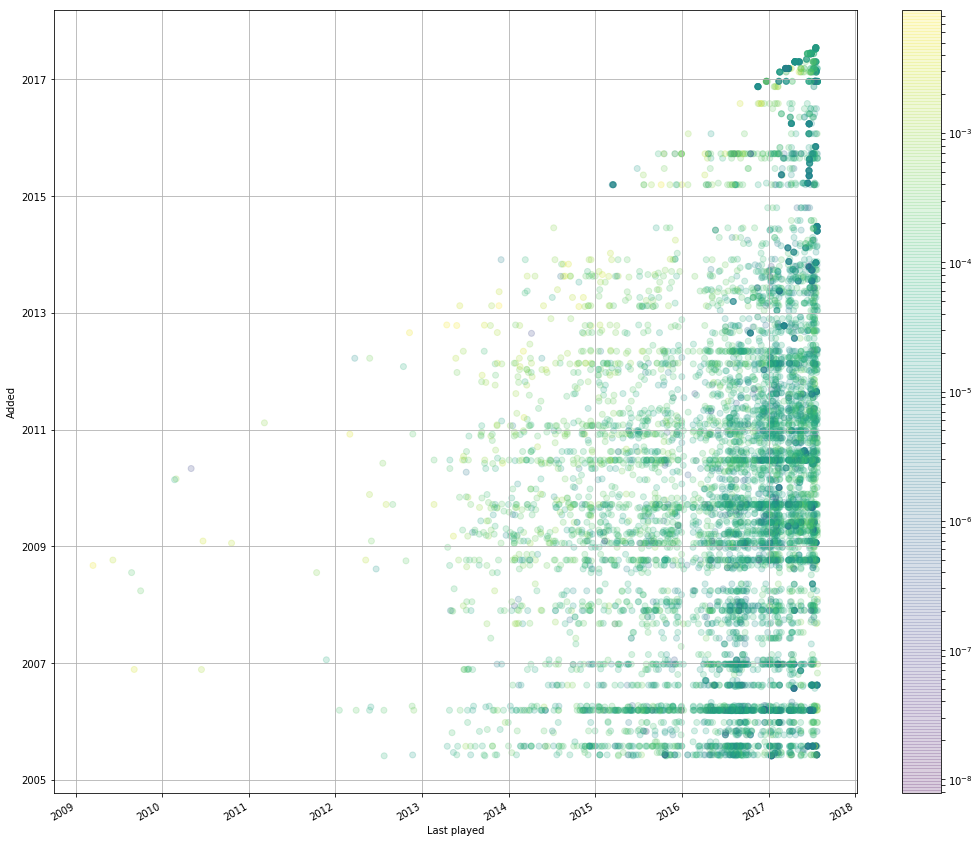

In [19]:
fig, ax = plt.subplots(figsize=(16, 16))
df_ = df.loc[(df['chance'] != 0.002)]
plt.scatter([o.to_pydatetime() for o in df_['date_considered']],
            [o.to_pydatetime() for o in df_['pAdd']],
            c=df_['chance'], alpha=0.2, norm=matplotlib.colors.LogNorm())
ax.set_xlabel('Last played')
ax.set_ylabel('Added')
ax.grid(True)
fig.autofmt_xdate()
plt.colorbar(fraction=0.05)
plt.show()